In [1]:
import pandas as pd
import numpy as np
import re

import requests ##http요청을 보내는 모듈

import datetime
%matplotlib inline 
##도표와 같은 그림, 소리, 애니메이션 과 같은 결과물들을 Rich output 이라 하고 이를 바로 이 브라우저에서 보이도록 함.

import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from selenium import webdriver
import urllib.parse
from tqdm import *
from urllib.request import urlopen

In [2]:
base_url = 'https://finance.naver.com/news/news_list.nhn?mode=LSS3D&section_id=101&section_id2=258&section_id3=402&date=20191129'
sec_url = 'https://finance.naver.com/news/news_list.nhn?mode=LSS3D&section_id=101&section_id2=258&section_id3=402&date=20191202'
trd_url = 'https://finance.naver.com/news/news_list.nhn?mode=LSS3D&section_id=101&section_id2=258&section_id3=402&date=20191203'
print(base_url)

https://finance.naver.com/news/news_list.nhn?mode=LSS3D&section_id=101&section_id2=258&section_id3=402&date=20191129


In [3]:
res = requests.get(base_url) ##base_url로 http요청 보내는 명령 변수로 저장
res.encoding='euc-kr' ##문자 인코딩 방식 설정

In [4]:
res.status_code ##200은 정상적으로 정보를 가져왔음을 의미

200

In [5]:
soup = BeautifulSoup(res.text, 'html.parser') ##html 태그 가져오는 도구
soup.encoding = 'euc-kr' ##네이버 금융은 인코딩 방식 영문으로 되어있음.

In [6]:
output_raw = soup.find(name='ul', attrs ={'class':'realtimeNewsList'}) ##div에서 detailscript 부분
output_subject1 = output_raw.find_all(name='dt', attrs={'class':'articleSubject'})
output_subject2 = output_raw.find_all(name='dd', attrs={'class':'articleSubject'})

In [7]:
lst = []
##페이지 넘어가게 하는 for문
for i in tqdm(range(1, 15)):
    page = '&page=' + str(i)
    url_page = base_url + page
    
    with urllib.request.urlopen(url_page) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
           
    for el in soup.find_all('dt', {'class' : 'articleSubject'}):
        lst.append(el.getText().strip().replace('\n',''))

    for el in soup.find_all('dd', {'class' : 'articleSubject'}):
        lst.append(el.getText().strip().replace('\n',''))
        
##긁어온 자료 리스트화

for i in tqdm(range(1, 10)):
    page = '&page=' + str(i)
    url_page = sec_url + page
    
    with urllib.request.urlopen(url_page) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
    
    for el in soup.find_all('dt', {'class' : 'articleSubject'}):
        lst.append(el.getText().strip().replace('\n',''))

    for el in soup.find_all('dd', {'class' : 'articleSubject'}):
        lst.append(el.getText().strip().replace('\n',''))
        

for i in tqdm(range(1, 10)):
    page = '&page=' + str(i)
    url_page = trd_url + page
    
    with urllib.request.urlopen(url_page) as response:
        html = response.read()
        soup = BeautifulSoup(html, 'html.parser')
    
    for el in soup.find_all('dt', {'class' : 'articleSubject'}):
        lst.append(el.getText().strip().replace('\n',''))

    for el in soup.find_all('dd', {'class' : 'articleSubject'}):
        lst.append(el.getText().strip().replace('\n',''))
            
lst

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:14<00:00,  1.62s/it]


['제이테크놀로지, 가처분신청 기각…12월12일 상장폐지',
 '거래소, 행남사 주권매매정지기간 변경',
 '알테오젠, 1.6兆 바이오의약품 주사제 기술 수출',
 '윈하이텍, 혁신제품 기반 ‘데크플레이트’ 사업경쟁력 강화',
 '경영간섭 우려에… 국민연금 주주권 결론 못냈다 [마켓워치]',
 "'홍콩인권법안' 미중 긴장감 고조.. 코스피 6거래일 만에 2100 무너져",
 "진로이즈백·테라 '쌍두마차' 하이트진로 실적 반등 본격화",
 '계룡건설, 2832억 규모 건축공사 수주',
 '오성첨단소재, 최대주주 이스트버건디 외 2인으로 변경',
 '롯데케미칼, 이사회서 롯데첨단소재와 소규모합병 승인',
 '[표]코스닥 기관·외국인·개인 순매수·도 상위종목(11월 29일-최종치)',
 '[표]유가증권 기관·외국인·개인 순매수·도 상위종목(11월 29일-최종치)',
 '펄어비스, 검은사막 불법 작업장 강력제재 ‘호평’',
 "윈하이텍, 수주 확대 위한 'DH-BEAM 제품설명회' 개최",
 '"왕이 온다" 사드보복 피해株 미워도 다시 한번?',
 'NH증권 퇴직연금 수수료율 업계 최저 수준 인하',
 "[마켓인사이트] 한림건설, '회생절차' 레이크힐스용인CC 인수",
 'CJ대한통운, 지역사회와 손잡고 `안전·행복한 등하굣길 만들기`',
 '[표]장외주식 거래현황(11/29)',
 '세빛섬 다음달 1일부터 `세빛 일루미네이션 빛축제` 개최',
 '[공시] CJ제일제당, 2000억원 규모 채무보증 결정',
 '현대차, 현대차투자증권 발행 MMT 700억원에 매수',
 'CJ제일제당, 계열사 2곳 채무보증 결정',
 '윈하이텍, 혁신제품 기반 ‘데크플레이트’ 사업경쟁력 강화',
 '상지카일룸, 254억 규모 신축공사 계약 해지',
 '메디포럼, 씨트리 지분인수 완료…최대주주 등극',
 'SCI평가정보, 사모투자 합자회사에 30억 출자',
 '파워넷, 전환가액 5142원→4126원으로 조정',
 '제넨바이오, 426만주 전환청구권 행사',
 '아이오케이컴퍼니, 초록뱀 지

In [ ]:
!pip install --upgrade pip
!pip install JPype1-0.6.3-cp37-cp37m-win_amd64.whl

In [11]:
!pip install konlpy

In [10]:
from pandas import DataFrame
df = pd.DataFrame(data = lst, index=range(0,len(lst)), columns=['기사내용'])
df.to_csv('Article_titles.csv', index=False)

In [11]:
titles = pd.read_csv('Article_titles.csv')
import konlpy

In [12]:
from konlpy.tag import *
hannanum = Hannanum()
okt = Okt()

In [13]:
from collections import Counter
from wordcloud import WordCloud
from nltk import tokenize
import nltk as nltk

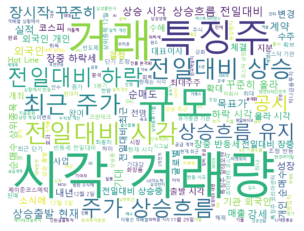

In [14]:
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=600).generate(' '.join(lst))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
def make_wordcloud(word_count):
 
    sentences_tag = []
    #형태소 분석하여 리스트에 넣기
    for sentence in lst:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        #print(morph)
        #print('-' * 30)
 
    #print(sentences_tag)
    #print('\n' * 3)
 
    noun_adj_list = []
    #명사와 형용사만 구분하여 리스트에 넣기(필요없는 조사 및 부사 고려하지 않기 위함)
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
 
    #형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(word_count)
    #print(tags)
 
    #wordCloud생성
    #한글꺠지는 문제 해결하기위해 font_path 지정
    wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=600).generate(' '.join( noun_adj_list))
    #print(dict(tags))
    cloud = wc.generate_from_frequencies(dict(tags))
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()
 

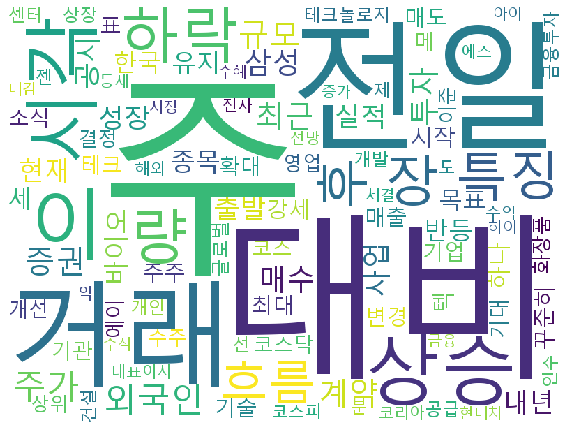

In [19]:
make_wordcloud(100)

In [ ]:
##삼성, 증권, 바이오, 화장품이 눈에 띔